## Ejercicio 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
excel_datos = pd.read_excel("./EjemploAjuste curvas.xlsx")
datos = excel_datos[["X","Y"]].to_numpy()

In [5]:
# Estas líneas preparan la división de datos:
#      Se establece una semilla aleatoria para reproducibilidad.
#      Se generan índices aleatorios para mezclar los datos.
#      Se calcula el número de muestras para entrenamiento (50% de los datos).
#      Se dividen los índices en conjuntos de entrenamiento y validación.

np.random.seed(42)
indices = np.random.permutation(len(datos))
n_train = int(0.5 * len(datos))
#train_indices, val_indices = indices[:n_train], indices[n_train:]

In [9]:
# Aquí se separan los datos en conjuntos de entrenamiento y validación.
X_train, y_train = datos[train_indices, 0], datos[train_indices, 1]
X_val, y_val = datos[val_indices, 0], datos[val_indices, 1]

NameError: name 'train_indices' is not defined

In [11]:
# Función para ajustar el modelo y=ax+b
def ajustar_modelo(X, y):
    X_design = np.column_stack([X, np.ones_like(X)])
    beta = np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y
    return beta

# Ajustar el modelo
a, b = ajustar_modelo(X_train, y_train)

# Función para calcular predicciones
def predecir(X, a, b):
    return a * X + b

# Calcular error cuadrático medio
def calcular_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Predicciones y error para el conjunto de entrenamiento
y_train_pred = predecir(X_train, a, b)
mse_train = calcular_mse(y_train, y_train_pred)

# Predicciones y error para el conjunto de validación
y_val_pred = predecir(X_val, a, b)
mse_val = calcular_mse(y_val, y_val_pred)

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
plt.scatter(X_val, y_val, color='red', label='Validación')
X_plot = np.linspace(0, 0.1, 100)
plt.plot(X_plot, predecir(X_plot, a, b), color='green', label='Modelo ajustado')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ajuste de Curvas: y = ax + b')
plt.legend()
plt.grid(True)

# Mostrar resultados
print(f"Modelo ajustado: y = {a:.4f}x + {b:.4f}")
print(f"MSE Entrenamiento: {mse_train:.4f}")
print(f"MSE Validación: {mse_val:.4f}")

plt.show()

NameError: name 'X_train' is not defined

### Ejercicio 2:
Ejercicio 1: EjemploAjusteCurvas.xls
Utiliza el procedimiento anterior para ajustar el modelo lineal más sencillo con los datos de ajuste. y = a*x+b
Una vez ajustado, sustituye los valores X del conjunto de validación en el modelo para obtener los valores Y predichos por el mismo
Calcula el error cometido por la predicción como la suma de diferencias al cuadrado entre los valores Y deseados del conjunto de validación y los valores Y’ predichos por el modelo
Ejercicio 2:
Repite el proceso para los modelos: 
y=a*x^2+b
y=a*x^2+b*x+c
¿Cuál de los tres modelos es mejor? ¿Con qué seguridad puedes afirmar que es mejor


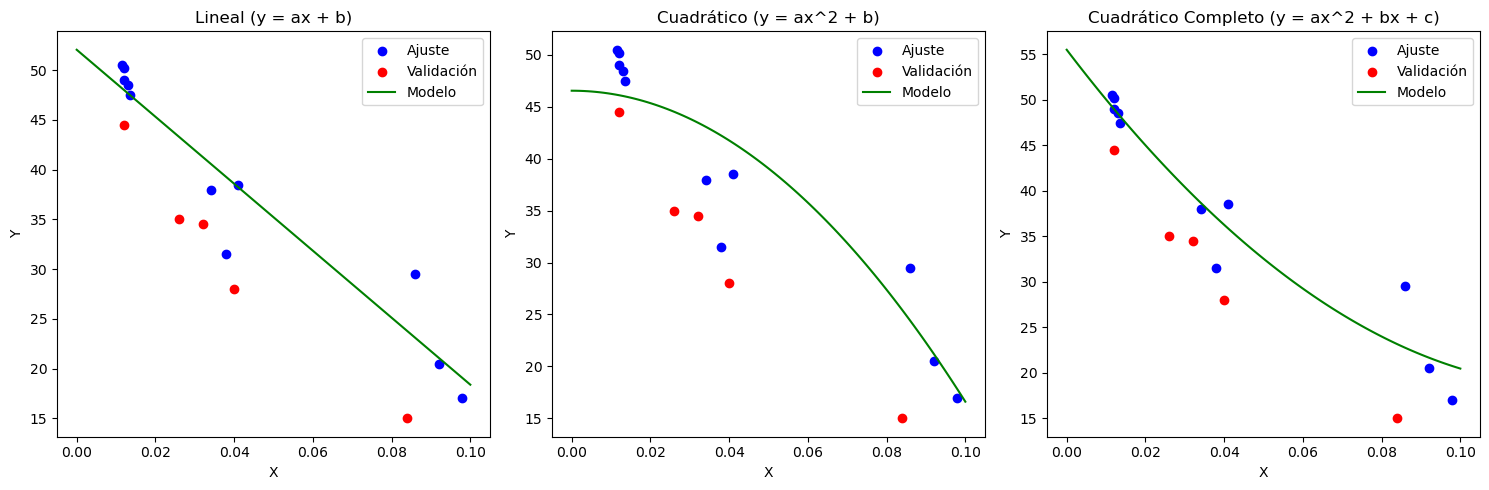

Resultados de los modelos:
Lineal (y = ax + b):
  Error de ajuste: 124.4222
  Error de validación: 315.8965
Cuadrático (y = ax^2 + b):
  Error de ajuste: 229.2543
  Error de validación: 472.2384
Cuadrático Completo (y = ax^2 + bx + c):
  Error de ajuste: 102.7459
  Error de validación: 231.9516


In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Datos proporcionados
excel_datos = pd.read_excel("./EjemploAjuste curvas.xlsx")
datos = excel_datos[["X","Y"]].to_numpy()

# Separar datos en conjuntos de ajuste y validación
np.random.seed(42)
indices = np.random.permutation(len(datos))
n_ajuste = int(0.7 * len(datos))
indices_ajuste, indices_validacion = indices[:n_ajuste], indices[n_ajuste:]

X_ajuste, y_ajuste = datos[indices_ajuste, 0], datos[indices_ajuste, 1]
X_validacion, y_validacion = datos[indices_validacion, 0], datos[indices_validacion, 1]

# Funciones de ajuste y predicción para cada modelo
def ajustar_modelo_lineal(X, y):
    X_design = np.column_stack([X, np.ones_like(X)])
    return np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y

def predecir_modelo_lineal(X, params):
    return params[0] * X + params[1]

def ajustar_modelo_cuadratico(X, y):
    X_design = np.column_stack([X**2, np.ones_like(X)])
    return np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y

def predecir_modelo_cuadratico(X, params):
    return params[0] * X**2 + params[1]

def ajustar_modelo_cuadratico_completo(X, y):
    X_design = np.column_stack([X**2, X, np.ones_like(X)])
    return np.linalg.inv(X_design.T @ X_design) @ X_design.T @ y

def predecir_modelo_cuadratico_completo(X, params):
    return params[0] * X**2 + params[1] * X + params[2]

# Función para calcular el error cuadrático
def calcular_error(y_true, y_pred):
    return np.sum((y_true - y_pred)**2)

# Ajuste y evaluación de los modelos
modelos = [
    ("Lineal (y = ax + b)", ajustar_modelo_lineal, predecir_modelo_lineal),
    ("Cuadrático (y = ax^2 + b)", ajustar_modelo_cuadratico, predecir_modelo_cuadratico),
    ("Cuadrático Completo (y = ax^2 + bx + c)", ajustar_modelo_cuadratico_completo, predecir_modelo_cuadratico_completo)
]

resultados = []

plt.figure(figsize=(15, 5))

for i, (nombre_modelo, ajustar, predecir) in enumerate(modelos, 1):
    # Ajustar modelo
    params = ajustar(X_ajuste, y_ajuste)
    
    # Calcular predicciones
    y_pred_ajuste = predecir(X_ajuste, params)
    y_pred_validacion = predecir(X_validacion, params)
    
    # Calcular errores
    error_ajuste = calcular_error(y_ajuste, y_pred_ajuste)
    error_validacion = calcular_error(y_validacion, y_pred_validacion)
    
    resultados.append((nombre_modelo, error_ajuste, error_validacion))
    
    # Visualización
    plt.subplot(1, 3, i)
    plt.scatter(X_ajuste, y_ajuste, color='blue', label='Ajuste')
    plt.scatter(X_validacion, y_validacion, color='red', label='Validación')
    X_plot = np.linspace(0, 0.1, 100)
    plt.plot(X_plot, predecir(X_plot, params), color='green', label='Modelo')
    plt.title(nombre_modelo)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

plt.tight_layout()
plt.show()

# Imprimir resultados
print("Resultados de los modelos:")
for nombre, error_ajuste, error_validacion in resultados:
    print(f"{nombre}:")
    print(f"  Error de ajuste: {error_ajuste:.4f}")
    print(f"  Error de validación: {error_validacion:.4f}")

En resumen, la relación entre X e Y parece ser no lineal, con una curvatura significativa, pero también con un fuerte componente lineal. El modelo cuadrático completo proporciona el mejor ajuste, capturando tanto la tendencia lineal general como las no linealidades en los datos. Sin embargo, dependiendo de las necesidades específicas de precisión y simplicidad, el modelo lineal también podría ser una opción viable si se prefiere una interpretación más sencilla.